# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [123]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc1 = sinasc_raw.copy()

In [5]:
bins = [-999999, -10.5, 999999]
labels = ['Menor ou igual a -10.5', 'Maior que -10.5']
sinasc1['grupo_latitude'] = pd.cut(sinasc1['munResLat'], bins=bins, labels=labels)
sinasc1['grupo_latitude'].value_counts()

grupo_latitude
Maior que -10.5           14034
Menor ou igual a -10.5    12993
Name: count, dtype: int64

In [6]:
analise_latitude = sinasc1.groupby('grupo_latitude')[['KOTELCHUCK', 'CONSPRENAT']].agg(['sum', 'mean', 'max', 'min', 'std', 'var'])

C:\Users\Emanoel\AppData\Local\Temp\ipykernel_11976\946564803.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_latitude = sinasc1.groupby('grupo_latitude')[['KOTELCHUCK', 'CONSPRENAT']].agg(['sum', 'mean', 'max', 'min', 'std', 'var'])


In [20]:
analise_latitude.reset_index()

grupo_latitude KOTELCHUCK                                        \
                                 sum      mean max min       std       var   
0  Menor ou igual a -10.5      61146  4.706073   9   1  1.649668  2.721405   
1         Maior que -10.5      73316  5.224170   9   1  2.362121  5.579617   

  CONSPRENAT                                            
         sum      mean   max  min       std        var  
0   110072.0  8.591321  99.0  0.0  4.243102  18.003915  
1   105365.0  7.931125  99.0  0.0  5.863665  34.382564

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc2 = sinasc_raw.copy()

In [9]:
bins = [0, 3000, 999999]
labels = ['Menor ou igual a 3000', 'Maior que 3000']
sinasc2['grupo_area'] = pd.cut(sinasc1['munResArea'], bins=bins, labels=labels)
sinasc2['grupo_area'].value_counts()

grupo_area
Maior que 3000           21808
Menor ou igual a 3000     5219
Name: count, dtype: int64

In [10]:
analise_area = sinasc2.groupby('grupo_area')[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'max', 'min', 'std', 'var'])

C:\Users\Emanoel\AppData\Local\Temp\ipykernel_11976\3219496178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_area = sinasc2.groupby('grupo_area')[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'max', 'min', 'std', 'var'])


In [11]:
analise_area.reset_index()

grupo_area IDADEMAE                                          \
                              sum       mean max min       std        var   
0  Menor ou igual a 3000   137389  26.324775  53  11  6.305535  39.759775   
1         Maior que 3000   567848  26.038518  53  12  6.405497  41.030387   

   IDADEPAI                                              
        sum       mean   max   min       std        var  
0   78074.0  31.092792  69.0  16.0  7.675474  58.912900  
1  158424.0  31.094014  86.0  15.0  7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
bins = [0, 10000, 999999]
labels = ['Menor ou igual a 10000', 'Maior que 10000']
sinasc2['grupo_altitude'] = pd.cut(sinasc1['munResArea'], bins=bins, labels=labels)
sinasc2['grupo_altitude'].value_counts()

grupo_altitude
Menor ou igual a 10000    15484
Maior que 10000           11543
Name: count, dtype: int64

In [18]:
analise_altitude = sinasc2.groupby('grupo_altitude')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'max', 'min', 'std', 'var'])
analise_altitude

C:\Users\Emanoel\AppData\Local\Temp\ipykernel_11976\2856554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_altitude = sinasc2.groupby('grupo_altitude')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'max', 'min', 'std', 'var'])


QTDFILVIVO                                           \
                              sum      mean   max  min       std       var   
grupo_altitude                                                               
Menor ou igual a 10000    14804.0  0.981372  30.0  0.0  1.108529  1.228836   
Maior que 10000           12022.0  1.159417  12.0  0.0  1.248668  1.559171   

                       QTDFILMORT                                           
                              sum      mean   max  min       std       var  
grupo_altitude                                                              
Menor ou igual a 10000     3602.0  0.242919   9.0  0.0  0.551826  0.304512  
Maior que 10000            3041.0  0.301059  28.0  0.0  0.693640  0.481137

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [116]:
regioes_imediatas = sinasc_raw[['DTNASC', 'munResNome', 'IDADEMAE']]
regioes_imediatas['regiao_imediata'] = regioes_imediatas['munResNome'].map(imediatas)
regioes_imediatas = regioes_imediatas.groupby(['DTNASC', 'regiao_imediata'])['IDADEMAE'].mean()
regioes_imediatas = pd.DataFrame(regioes_imediatas).reset_index().sort_values('DTNASC', ascending=True)
regioes_imediatas['mes-ano'] = pd.to_datetime(regioes_imediatas['DTNASC']).dt.strftime('%m/%Y')

C:\Users\Emanoel\AppData\Local\Temp\ipykernel_11976\1273796775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regioes_imediatas['regiao_imediata'] = regioes_imediatas['munResNome'].map(imediatas)


C:\Users\Emanoel\AppData\Local\Temp\ipykernel_11976\1871147215.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=regioes_imediatas, x='mes-ano', y='IDADEMAE', hue='regiao_imediata', marker='o', ci=None)


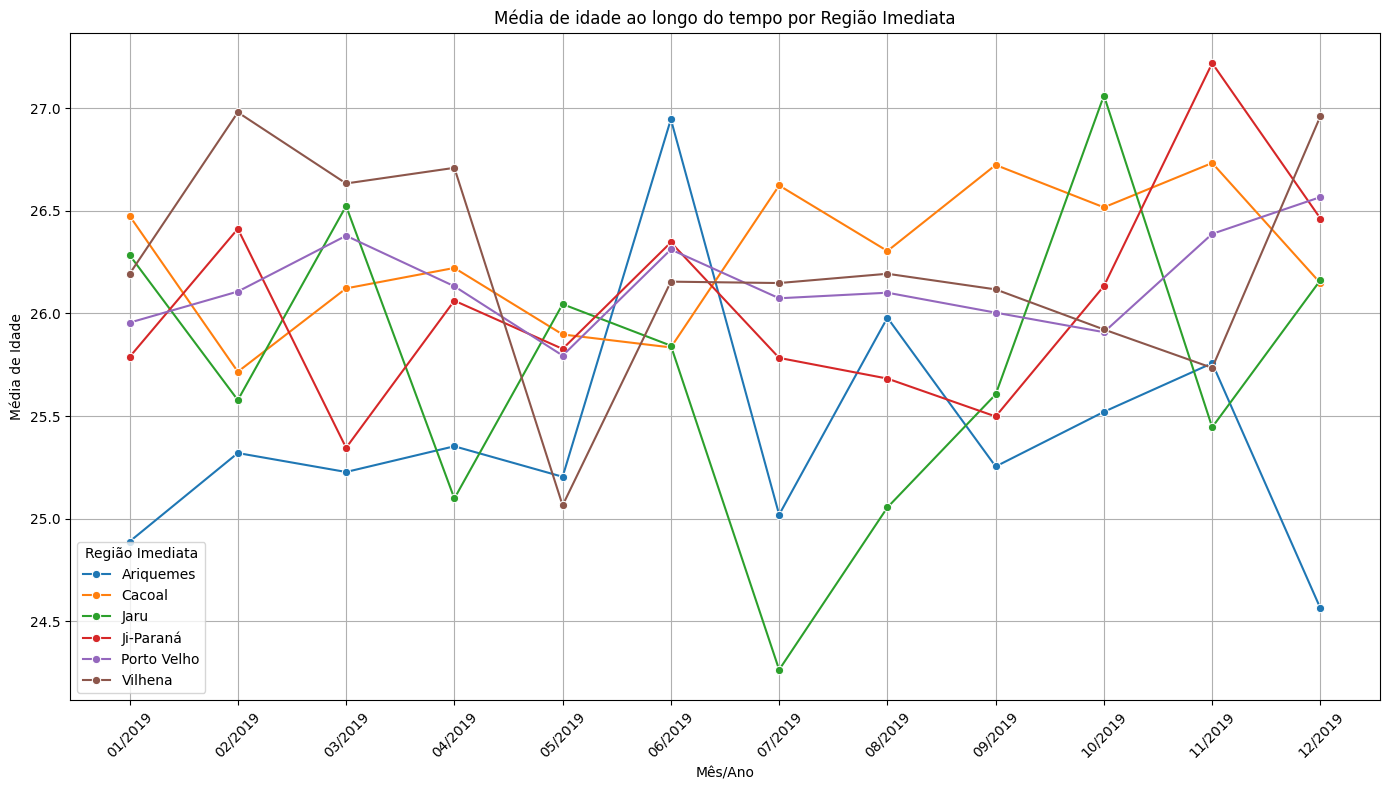

In [115]:
plt.figure(figsize=(14,8))
sns.lineplot(data=regioes_imediatas, x='mes-ano', y='IDADEMAE', hue='regiao_imediata', marker='o', ci=None)
plt.title('Média de idade ao longo do tempo por Região Imediata')
plt.xlabel('Mês/Ano')
plt.ylabel('Média de Idade')
plt.xticks(rotation=45)
plt.legend(title='Região Imediata')
plt.grid(True)
plt.tight_layout()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [129]:
idh = {
    "Porto Velho": "ALTO",
"Vilhena": "ALTO",
"Cacoal": "ALTO",
"Ji-Paraná": "ALTO",
"Pimenta Bueno": "ALTO",
"Ariquemes": "ALTO",
"Rolim de Moura": "ALTO",
"Cerejeiras": "MÉDIO",
"Jaru": "MÉDIO",
"Colorado do Oeste": "MÉDIO",
"Ouro Preto do Oeste": "MÉDIO",
"Espigão D'Oeste": "MÉDIO",
"Santa Luzia D'Oeste": "MÉDIO",
"Pimenteiras do Oeste": "MÉDIO",
"Presidente Médici": "MÉDIO",
"Castanheiras": "MÉDIO",
"Guajará-Mirim": "MÉDIO",
"Chupinguaia": "MÉDIO",
"Cabixi": "MÉDIO",
"Candeias do Jamari": "MÉDIO",
"São Felipe D'Oeste": "MÉDIO",
"Cacaulândia": "MÉDIO",
"São Miguel do Guaporé": "MÉDIO",
"Alvorada D'Oeste": "MÉDIO",
"Mirante da Serra": "MÉDIO",
"Nova Brasilândia D'Oeste": "MÉDIO",
"Rio Crespo": "MÉDIO",
"Teixeirópolis": "MÉDIO",
"Alta Floresta D'Oeste": "MÉDIO",
"Primavera de Rondônia": "MÉDIO",
"Ministro Andreazza": "MÉDIO",
"Novo Horizonte do Oeste": "MÉDIO",
"Vale do Paraíso": "MÉDIO",
"Alto Paraíso": "MÉDIO",
"Parecis": "MÉDIO",
"Buritis": "MÉDIO",
"Itapuã do Oeste": "MÉDIO",
"Corumbiara": "MÉDIO",
"Cujubim": "MÉDIO",
"Costa Marques": "MÉDIO",
"São Francisco do Guaporé": "MÉDIO",
"Urupá": "MÉDIO",
"Monte Negro": "MÉDIO",
"Seringueiras": "BAIXO",
"Governador Jorge Teixeira": "BAIXO",
"Machadinho D'Oeste": "BAIXO",
"Campo Novo de Rondônia": "BAIXO",
"Alto Alegre dos Parecis": "BAIXO",
"Theobroma": "BAIXO",
"Nova Mamoré": "BAIXO",
"Nova União": "BAIXO",
"Vale do Anari": "BAIXO"
}

In [135]:
sinasc_idh = sinasc_raw.copy()
sinasc_idh['IDH-M'] = sinasc_idh['munResNome'].map(idh)
sinasc_idh_agrupado = sinasc_idh.groupby('IDH-M')[['APGAR5', 'APGAR1', 'KOTELCHUCK', 'PESO', 'CONSULTAS', 'IDADEMAE', 'IDADEPAI']].mean()
sinasc_idh_agrupado

,APGAR5,APGAR1,KOTELCHUCK,PESO,CONSULTAS,IDADEMAE,IDADEPAI
IDH-M,,,,,,,
ALTO,9.171668,8.172839,5.034530,3245.623791,3.526372,26.280332,31.074091
BAIXO,9.172527,8.017014,4.971522,3231.456188,3.641292,25.326944,30.617450
MÉDIO,9.195668,8.092265,4.855859,3240.847592,3.663551,25.884855,31.207092


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [132]:
ifdm = {
"Ji-Paraná": "MODERADO",
"Vilhena": "MODERADO",
"Ariquemes": "MODERADO",
"Cacoal": "MODERADO",
"Pimenta Bueno": "MODERADO",
"Pimenteiras do Oeste": "MODERADO",
"Porto Velho": "MODERADO",
"Rolim de Moura": "MODERADO",
"Ouro Preto do Oeste": "MODERADO",
"Primavera de Rondônia": "MODERADO",
"Corumbiara": "MODERADO",
"Rio Crespo": "MODERADO",
"Jaru": "MODERADO",
"Chupinguaia": "MODERADO",
"Cerejeiras": "MODERADO",
"Espigão D'Oeste": "MODERADO",
"Colorado do Oeste": "MODERADO",
"Teixeirópolis": "MODERADO",
"São Felipe D'Oeste": "MODERADO",
"Alvorada D'Oeste": "MODERADO",
"Ministro Andreazza": "MODERADO",
"Parecis": "MODERADO",
"Buritis": "MODERADO",
"Urupá": "MODERADO",
"Santa Luzia D'Oeste": "MODERADO",
"São Miguel do Guaporé": "MODERADO",
"Novo Horizonte do Oeste": "MODERADO",
"Mirante da Serra": "MODERADO",
"Seringueiras": "MODERADO",
"Itapuã do Oeste": "MODERADO",
"São Francisco do Guaporé": "MODERADO",
"Alta Floresta D'Oeste": "MODERADO",
"Presidente Médici": "REGULAR",
"Campo Novo de Rondônia": "REGULAR",
"Cabixi": "REGULAR",
"Alto Alegre dos Parecis": "REGULAR",
"Theobroma": "REGULAR",
"Vale do Anari": "REGULAR",
"Cacaulândia": "REGULAR",
"Nova Brasilândia D'Oeste": "REGULAR",
"Costa Marques": "REGULAR",
"Monte Negro": "REGULAR",
"Vale do Paraíso": "REGULAR",
"Machadinho D'Oeste": "REGULAR",
"Guajará-Mirim": "REGULAR",
"Governador Jorge Teixeira": "REGULAR",
"Candeias do Jamari": "REGULAR",
"Castanheiras": "REGULAR",
"Nova União": "REGULAR",
"Alto Paraíso": "REGULAR",
"Nova Mamoré": "REGULAR",
"Cujubim": "REGULAR"
}

In [137]:
sinasc_ifdm = sinasc_raw.copy()
sinasc_ifdm['IFDM'] = sinasc_ifdm['munResNome'].map(ifdm)
sinasc_ifdm_agrupado = sinasc_ifdm.groupby('IFDM')[['APGAR5', 'APGAR1', 'KOTELCHUCK', 'PESO', 'CONSULTAS', 'IDADEMAE', 'IDADEPAI']].mean()
sinasc_ifdm_agrupado

,APGAR5,APGAR1,KOTELCHUCK,PESO,CONSULTAS,IDADEMAE,IDADEPAI
IFDM,,,,,,,
MODERADO,9.183149,8.156162,4.927865,3243.492973,3.580093,26.233296,31.151358
REGULAR,9.158830,8.042716,5.213327,3241.672182,3.558363,25.390206,30.644752


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [138]:
pib = {
"Porto Velho": "Acima de 1 bilhão",
"Ji-Paraná": "Acima de 1 bilhão",
"Vilhena": "Acima de 1 bilhão",
"Ariquemes": "Acima de 1 bilhão",
"Cacoal": "Acima de 1 bilhão",
"Jaru": "Acima de 1 bilhão",
"Rolim de Moura": "Acima de 1 bilhão",
"Pimenta Bueno": "Acima de 1 bilhão",
"Guajará-Mirim": "Acima de 500 milhões",
"Ouro Preto do Oeste": "Acima de 500 milhões",
"Buritis": "Acima de 500 milhões",
"Machadinho D'Oeste": "Acima de 500 milhões",
"Espigão D'Oeste": "Acima de 500 milhões",
"São Miguel do Guaporé": "Acima de 500 milhões",
"Candeias do Jamari": "Acima de 500 milhões",
"Nova Mamoré": "Acima de 500 milhões",
"Cerejeiras": "Acima de 500 milhões",
"Alta Floresta D'Oeste": "Acima de 300 milhões",
"Presidente Médici": "Acima de 300 milhões",
"Cujubim": "Acima de 300 milhões",
"Nova Brasilândia D'Oeste": "Acima de 300 milhões",
"Alto Paraíso": "Acima de 300 milhões",
"São Francisco do Guaporé": "Acima de 300 milhões",
"Corumbiara": "Acima de 300 milhões",
"Colorado do Oeste": "Acima de 300 milhões",
"Chupinguaia": "Acima de 300 milhões",
"Monte Negro": "Acima de 200 milhões",
"Alto Alegre dos Parecis": "Acima de 200 milhões",
"Campo Novo de Rondônia": "Acima de 200 milhões",
"Alvorada D'Oeste": "Acima de 200 milhões",
"Costa Marques": "Acima de 200 milhões",
"Seringueiras": "Acima de 200 milhões",
"Mirante da Serra": "Acima de 200 milhões",
"Ministro Andreazza": "Acima de 200 milhões",
"Urupá": "Acima de 200 milhões",
"Theobroma": "Acima de 100 milhões",
"Itapuã do Oeste": "Acima de 100 milhões",
"Governador Jorge Teixeira": "Acima de 100 milhões",
"Vale do Anari": "Acima de 100 milhões",
"Novo Horizonte do Oeste": "Acima de 100 milhões",
"Vale do Paraíso": "Acima de 100 milhões",
"Cacaulândia": "Acima de 100 milhões",
"Santa Luzia D'Oeste": "Acima de 100 milhões",
"Cabixi": "Acima de 100 milhões",
"Nova União": "Acima de 100 milhões",
"Pimenteiras do Oeste": "Acima de 100 milhões",
"Rio Crespo": "Acima de 100 milhões",
"Parecis": "Acima de 100 milhões",
"Castanheiras": "Acima de 100 milhões",
"Teixeirópolis": "Até 100 milhões",
"São Felipe D'Oeste": "Até 100 milhões",
"Primavera de Rondônia": "Até 100 milhões"
}

In [140]:
sinasc_pib = sinasc_raw.copy()
sinasc_pib['PIB'] = sinasc_pib['munResNome'].map(pib)
sinasc_pib_agrupado = sinasc_pib.groupby('PIB')[['APGAR5', 'APGAR1', 'KOTELCHUCK', 'PESO', 'CONSULTAS', 'IDADEMAE', 'IDADEPAI']].mean()
sinasc_pib_agrupado

,APGAR5,APGAR1,KOTELCHUCK,PESO,CONSULTAS,IDADEMAE,IDADEPAI
PIB,,,,,,,
Acima de 1 bilhão,9.166223,8.167346,5.018268,3247.215719,3.541103,26.265562,31.108387
Acima de 100 milhões,9.122192,8.066487,4.765709,3247.891382,3.719928,25.990126,31.541966
Acima de 200 milhões,9.247724,8.012354,4.639663,3221.890473,3.721322,25.535969,31.141745
Acima de 300 milhões,9.085450,7.989843,4.608114,3236.692485,3.724758,25.730751,30.218475
Acima de 500 milhões,9.272004,8.156886,5.166125,3239.456087,3.549954,25.782528,31.322907
Até 100 milhões,9.130435,8.006211,4.720497,3158.950311,3.807453,26.447205,31.570312


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Fazendo análise desses indicadores que podem influenciar na saúde do bebê, na maioria deles, existe a falta de insights, pois acabam sendo dados muito parecidos, apesar de notar uma pequena diferença, brutamente eles são muito parecidos entre si, notamos por exemplo, mais especificamente, quanto se trata de PIB, acabamos vendo que existem mais consultas pré natal em municípios com o PIB menor, por exemplo, uma média de 3.80 (a maior) consultas em municípios até 100M de PIB, em relação a que tem o maior PIB, acima de 1BI de PIB, 3.54 de média de consultas (a menor).
Mas brutamente os dados são bastante lineares.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.